In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/ML Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis = True)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [ ]:
X_train.shape

(537, 8)

In [ ]:
model = Sequential([
    Dense(256, input_dim = 8, activation = 'relu', kernel_regularizer = l1(0.01)),
    Dense(256, input_dim = 8, activation = 'relu'),
    Dropout(0.5),
    Dense(256, input_dim = 8, activation = 'relu'),
    Dense(256, input_dim = 8, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               2304      
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 2)                 514       
                                                                 
Total params: 200194 (782.01 KB)
Trainable params: 200

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 0.5233 - accuracy: 0.7506 - val_loss: 0.6633 - val_accuracy: 0.6574
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.5661 - accuracy: 0.7296 - val_loss: 0.6895 - val_accuracy: 0.6574
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7273 - val_loss: 0.6848 - val_accuracy: 0.6481
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5464 - accuracy: 0.7506 - val_loss: 0.5946 - val_accuracy: 0.7222
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5106 - accuracy: 0.7739 - val_loss: 0.6531 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5170 - accuracy: 0.7506 - val_loss: 0.6961 - val_accuracy: 0.6574
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7459 - val_loss: 0.5780 - val_accuracy: 0.7222
Epoch 8/100


Text(0, 0.5, 'Accuracy')

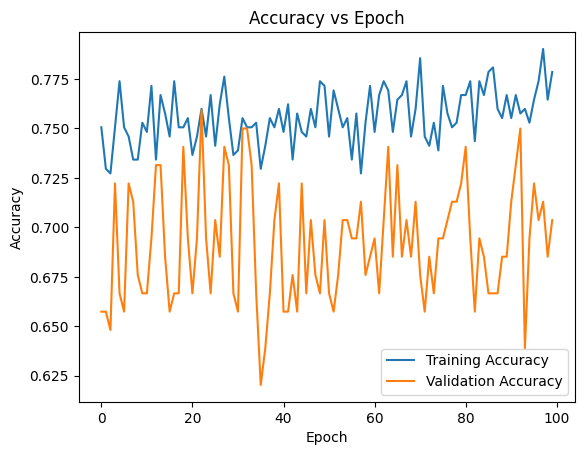

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

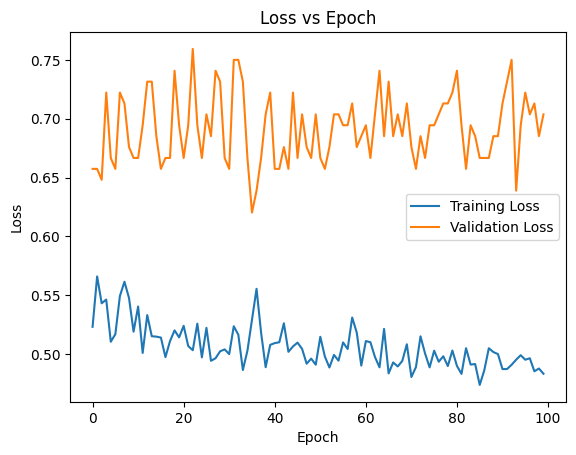

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
y_pred = model.predict(X_test)
y_pred

8/8 [==============================] - 0s 2ms/step


array([[7.69535303e-01, 2.30464742e-01],
       [8.97632241e-01, 1.02367789e-01],
       [9.79284286e-01, 2.07157638e-02],
       [8.84105921e-01, 1.15894057e-01],
       [9.89015698e-01, 1.09842690e-02],
       [9.44484234e-01, 5.55157140e-02],
       [8.56308341e-01, 1.43691629e-01],
       [6.19059205e-01, 3.80940735e-01],
       [9.95106637e-01, 4.89330757e-03],
       [9.09869611e-01, 9.01304334e-02],
       [9.56594229e-01, 4.34057787e-02],
       [4.49934602e-01, 5.50065398e-01],
       [9.45759356e-01, 5.42405918e-02],
       [7.57623672e-01, 2.42376328e-01],
       [9.41447198e-01, 5.85527532e-02],
       [8.95967126e-01, 1.04032896e-01],
       [7.60918856e-01, 2.39081144e-01],
       [9.52251673e-01, 4.77482788e-02],
       [9.62978601e-01, 3.70214060e-02],
       [7.89796054e-01, 2.10203961e-01],
       [9.78439689e-01, 2.15602182e-02],
       [8.34812522e-01, 1.65187418e-01],
       [9.09535468e-01, 9.04644728e-02],
       [9.65005755e-01, 3.49942744e-02],
       [5.648772

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.70995670995671